# Project Title

### By: Polina, Tyler Marino

### Notes: Segmentation using Watershed algorithm

import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def watershed():
    root = os.getcwd()
    imgPath = os.path.join('image.jpg')
    
    img = cv2.imread(imgpath)
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.subplot(231)
    plt.imshow(img, cmap = 'gray')

    plt.subplot(232)
    _,imgThreshold = cv2.threshold(img, alpha, beta, cv2.THRESH_BINARY_INV)
    plt.imshow(imgThreshold, cmap = 'gray')

    plt.subplot(233)
    #Smooth in some of the contestable points if you have lots of leaf like features #with small space between
    kernel = np.ones((3,3), dtype = np.uint8)
    imgDilate = cv.morphologyEx(imgThreshold, cv.MORPH_DILATE, kernel)
    plt.imshow(imgDilate)

    plt.subplot(234)
    #find distance between curent pixel to nearest 0 val pixel, output is like a heatmap, center of regions perhaps!!
    distTransform = cv.distanceTransform(imageDialate, cv.DIST_L2, 5)
    plt.imshow()

    plt.subplot(235)
    _, distThresh = cv2.threshold(distTrans, min, max, cv2.THRESH_BINARY)
    plt.imshow(distThresh)

    plt.subplot(236)
    distThresh = np.unit8(distThresh)
    _,labels = cv2.connectedComponents(distThresh)
    plt.imshow(labels)

    plt.figure()
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv2.watershed(imgRGB, labels)
    plt.imshow(labels)
    plt.show()



In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

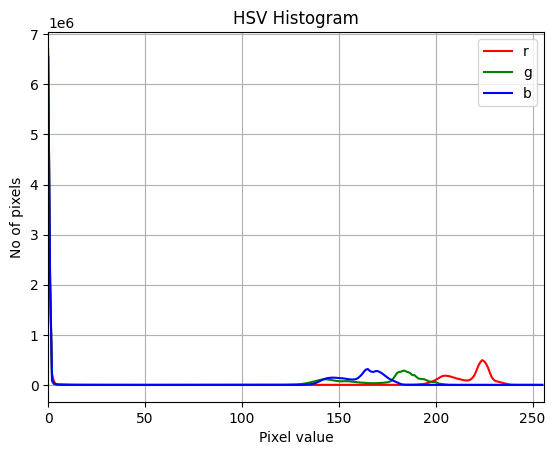

H min: 0 S Min: 0 V Min: 0
H max: 179 S Max: 255 V Max: 255
H mean: 20.94323371548443 S mean: 34.507235833393814 V mean: 95.4888669890405


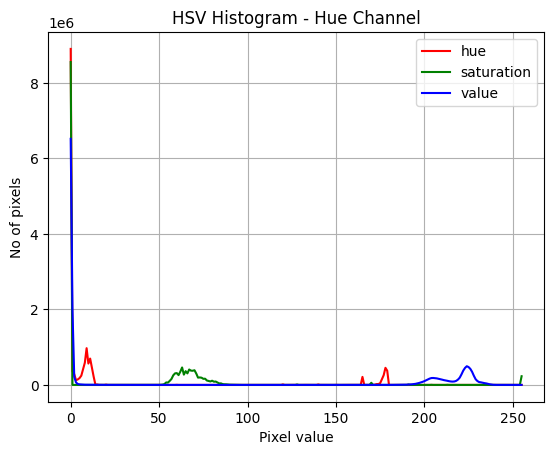

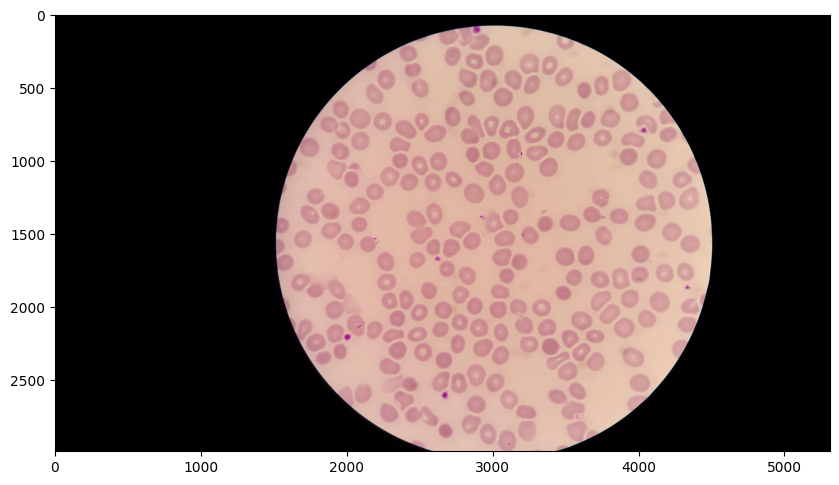

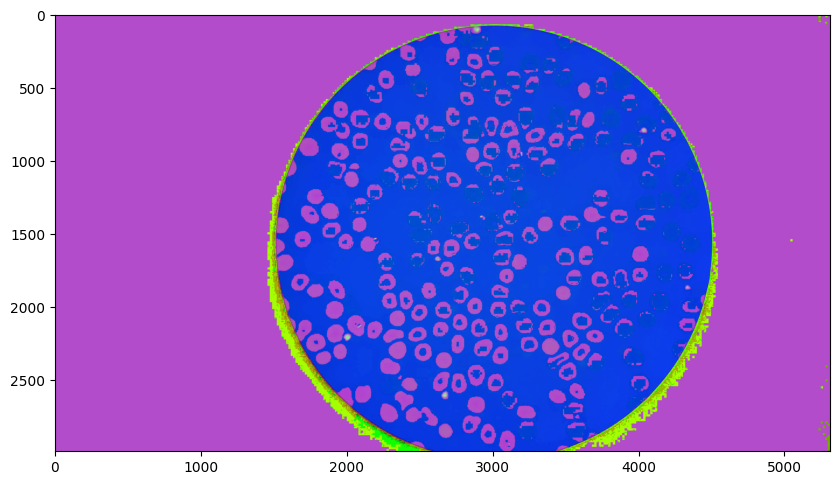

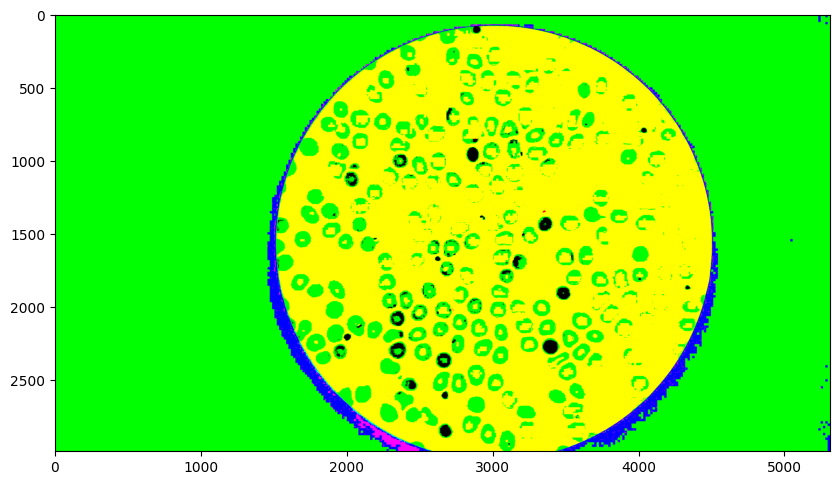

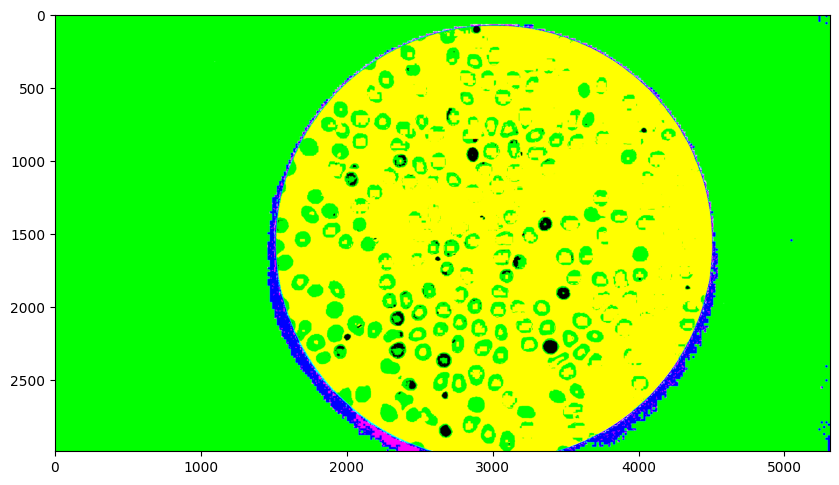

In [65]:


def watershed():
    root = os.getcwd()
    imgPath = os.path.join('Data/SampleBloodCells.jpg')
    
    img= cv2.imread(imgPath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # plt.figure()
    # plt.subplot(23)
    # plt.imshow(imgRGB)
    
    #Histogram for each channel
    imgHist = []
    color = ('r','g','b')
    for i,col in enumerate(color):
        hist = cv2.calcHist([imgRGB],[i],None,[256],[0,256])
        imgHist.append(hist)
        plt.plot(hist, color = col)
        plt.xlim([0,256])
    plt.title('HSV Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.legend(color)
    plt.grid()
    plt.show()

    # make histogram in hsv space

    h, s, v = img[:,:,0], img[:,:,1], img[:,:,2]
    #print simple stats
    print("H min:", np.min(h), "S Min:", np.min(s), "V Min:", np.min(v))
    print("H max:", np.max(h), "S Max:", np.max(s), "V Max:", np.max(v))
    print("H mean:", np.mean(h), "S mean:", np.mean(s), "V mean:", np.mean(v))
    #
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="hue")
    plt.plot(hist_s, color='g', label="saturation")
    plt.plot(hist_v, color='b', label="value")
    plt.title('HSV Histogram - Hue Channel')
    plt.xlabel('Pixel value')
    plt.ylabel('No of pixels')
    plt.legend()
    plt.grid()
    plt.show()

     #Histogram for each channel    
    

    plt.figure(figsize=(10,7))
    plt.imshow(imgRGB)
    plt.show()

    


    plt.figure(figsize=(10,7))
    # plt.subplot(232)
    #replace black pixels with median non black color
    img[np.where((img<=[25,25,25]).all(axis=2))] = np.median(img[np.where((img>=[25,25,25]).all(axis=2))], axis=0)
    plt.imshow(img)

    plt.figure(figsize=(10,7))
    # plt.subplot(233)
    _,imgThreshold = cv2.threshold(img, 85, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(imgThreshold, cmap = 'gray')

    plt.figure(figsize=(10,7))
    # plt.subplot(233)
    #Smooth in some of the contestable points if you have lots of leaf like features #with small space between
    kernel = np.ones((3,3), dtype = np.uint8)
    imgDilate = cv2.morphologyEx(imgThreshold, cv2.MORPH_DILATE, kernel)
    plt.imshow(imgDilate)

    # plt.figure(figsize=(10,7))
    # # plt.subplot(234)
    # # find distance between curent pixel to nearest 0 val pixel, output is like a heatmap, center of regions perhaps!!
    # distTransform = cv2.distanceTransform(imgDilate, cv2.DIST_L2, 3)
    # plt.imshow(distTransform, cmap = 'gray')

    # plt.subplot(235)
    # _, distThresh = cv2.threshold(distTransform, 100, 255, cv2.THRESH_BINARY)
    # plt.imshow(distThresh)

    # plt.subplot(236)
    # distThresh = np.uint8(distThresh)
    # _,labels = cv2.connectedComponents(distThresh)
    # plt.imshow(labels)

    # plt.figure()
    # plt.subplot(121)
    # labels = np.int32(labels)
    # labels = cv2.watershed(imgRGB, labels)
    # plt.imshow(labels)
    # plt.show()

watershed()